# Miniproject 2
# Philip Carr, Bradley Justice, Thomas Leing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(filename, skiprows=1, delimiter=","):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=delimiter)

In [3]:
def load_movies_data():
    """
    Load the movies.txt file.
    """
    genre_index_start = -19
    movies_data = {}
    movies_file = open("data/movies.txt", "r")
    lines = movies_file.readlines()
    for i in range(len(lines)):
        line = lines[i].split()
        length = len(line)
        movies_data[int(line[0])] = \
            [" ".join(line[1:length + genre_index_start - 1])] \
            + list(map(int, line[genre_index_start:]))
    return movies_data

In [4]:
data = load_data("data/data.txt", skiprows=0, delimiter="\t")
train_data = load_data("data/train.txt", skiprows=0, delimiter="\t")
test_data = load_data("data/test.txt", skiprows=0, delimiter="\t")
movies_data = load_movies_data()

## Basic Visualizations

### 1. All ratings in the MovieLens Dataset

In [5]:
all_ratings = data[:,2]

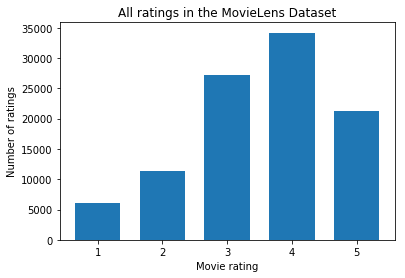

In [6]:
plt.figure()
plt.title("All ratings in the MovieLens Dataset")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(all_ratings, bins=np.arange(1,7), align="left", rwidth=0.7)
plt.show()

### 2. All ratings of the ten most popular movies (movies which have received the most ratings).

In [7]:
movie_ratings_dict = {}
for i in range(len(data)):
    movie_id = data[i,1]
    rating = data[i,2]
    if movie_id in movie_ratings_dict:
        movie_ratings_dict[movie_id][0] += 1
        movie_ratings_dict[movie_id][1].append(rating)
        movie_ratings_dict[movie_id][2] = \
            np.mean(np.array(movie_ratings_dict[movie_id][1]))
    else:
        movie_ratings_dict[movie_id] = [1, [rating], rating]

In [8]:
movie_popularities = []
for i in movie_ratings_dict:
    movie_popularities.append((movie_ratings_dict[i][0], i))
movie_popularities.sort()
movie_popularities.reverse()

In [9]:
top_10_most_popular_movies = movie_popularities[:10]
for i in range(len(top_10_most_popular_movies)):
    top_10_most_popular_movies[i] = top_10_most_popular_movies[i][1]

In [10]:
top_10_most_popular_movies_ratings = []
for i in top_10_most_popular_movies:
    top_10_most_popular_movies_ratings.extend(
        movie_ratings_dict[i][1])

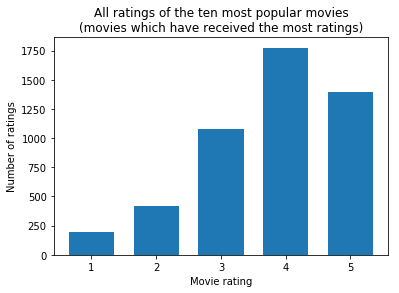

In [11]:
plt.figure()
plt.title("All ratings of the ten most " +
          "popular movies\n(movies which " +
          "have received the most ratings)")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(top_10_most_popular_movies_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

### 3. All ratings of the ten best movies (movies with the highest average ratings).

In [12]:
movie_average_ratings = []
for i in movie_ratings_dict:
    movie_average_ratings.append((movie_ratings_dict[i][2], i))
movie_average_ratings.sort()
movie_average_ratings.reverse()

In [13]:
top_10_best_movies = movie_average_ratings[:10]
for i in range(len(top_10_best_movies)):
    top_10_best_movies[i] = top_10_best_movies[i][1]

In [14]:
top_10_best_movies_ratings = []
for i in top_10_best_movies:
    top_10_best_movies_ratings.extend(
        movie_ratings_dict[i][1])

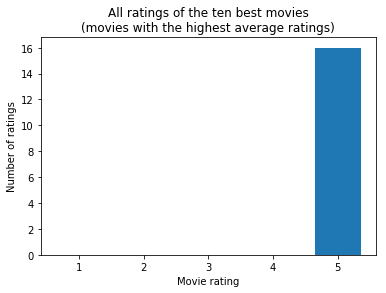

In [15]:
plt.figure()
plt.title("All ratings of the ten best movies\n" +
          "(movies with the highest average " +
          "ratings)")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(top_10_best_movies_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

### 4. All ratings of movies from three genres of your choice (create three separate visualizations).

In [16]:
genres_dict = {
    "Unknown" : 0,
    "Action" : 1,
    "Adventure" : 2,
    "Animation" : 3,
    "Children’s" : 4,
    "Comedy" : 5,
    "Crime" : 6,
    "Documentary" : 7,
    "Drama" : 8,
    "Fantasy" : 9,
    "Film-Noir" : 10,
    "Horror" : 11,
    "Musical" : 12,
    "Mystery" : 13,
    "Romance" : 14,
    "Sci-Fi" : 15,
    "Thriller" : 16,
    "War" : 17,
    "Western" : 18,
}

In [17]:
action_movies = []
adventure_movies = []
animation_movies = []
for i in movies_data:
    if movies_data[i][1+genres_dict["Action"]] == 1:
        action_movies.append(i)
    elif movies_data[i][1+genres_dict["Adventure"]] == 1:
        adventure_movies.append(i)
    elif movies_data[i][1+genres_dict["Animation"]] == 1:
        animation_movies.append(i)

In [18]:
action_movie_ratings = []
adventure_movie_ratings = []
animation_movie_ratings = []
for i in range(len(action_movies)):
    action_movie_ratings.extend(
        movie_ratings_dict[action_movies[i]][1])
for i in range(len(adventure_movies)):
    adventure_movie_ratings.extend(
        movie_ratings_dict[adventure_movies[i]][1])
for i in range(len(animation_movies)):
    animation_movie_ratings.extend(
        movie_ratings_dict[animation_movies[i]][1])

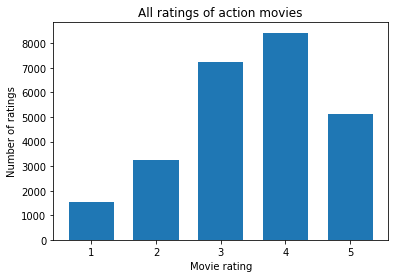

In [19]:
plt.figure()
plt.title("All ratings of action movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(action_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

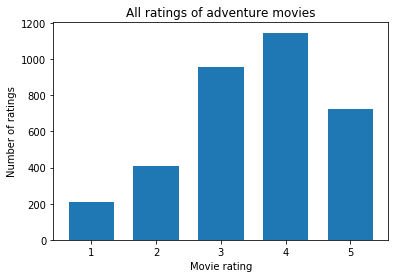

In [20]:
plt.figure()
plt.title("All ratings of adventure movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(adventure_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

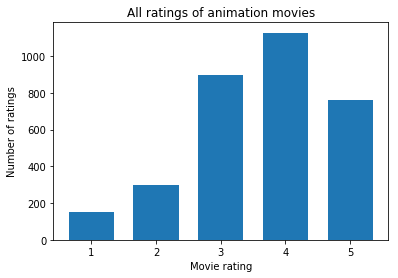

In [21]:
plt.figure()
plt.title("All ratings of animation movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(animation_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()